In [1]:
import mglearn
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

In [2]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [3]:
pipe = Pipeline([("scaler", MinMaxScaler()), ('svm', SVC())])
pipe.fit(x_train, y_train)
print('테스트 점수 : {:.2f}'.format(pipe.score(x_test, y_test)))

테스트 점수 : 0.97


In [4]:
param_grid = {'svm__C' : [0.001, 0.01, 0.1, 1, 10, 100],
              'svm__gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}

In [5]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(x_train, y_train)
print('최상의 교차 검증 정확도 : {:.2f}'.format(grid.best_score_))
print('테스트 세트 점수 : {:.2f}'.format(grid.score(x_test, y_test)))
print('최적의 매개변수 : {}'.format(grid.best_params_))

최상의 교차 검증 정확도 : 0.98
테스트 세트 점수 : 0.97
최적의 매개변수 : {'svm__C': 1, 'svm__gamma': 1}


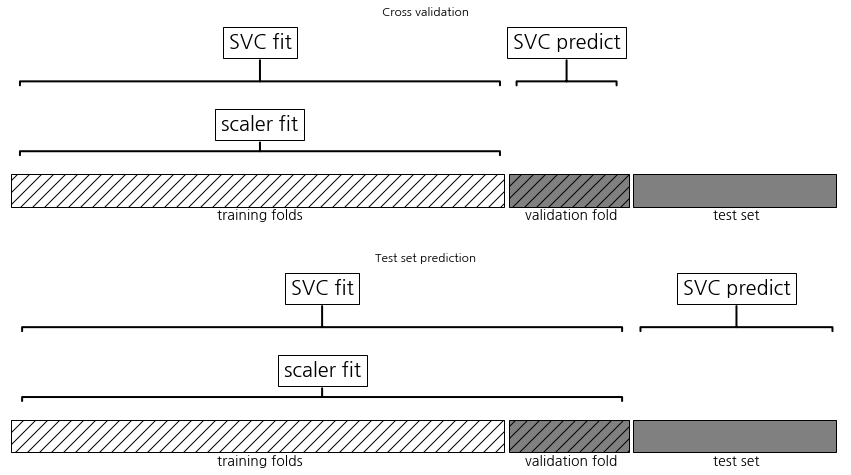

In [6]:
mglearn.plots.plot_proper_processing()

In [7]:
def fit(self, x, y):
    x_transformed = x
    for name, estimator in self.steps[:-1]:
        x_transformed = estimator.fit_transform(x_transformed, y)
    self.steps[-1][1].fit(x_transformed, y)
    return self

In [8]:
def predict(self, x):
    x_transformed = x
    for step in self.steps[:-1]:
        x_transformed = step[1].transform(x_transformed)
    return self.steps[-1][1].predict(x_transformed)

In [9]:
# 표준적인 방법
pipe_long = Pipeline([('scaler', MinMaxScaler()), ('svm', SVC(C=100))])

# 간소화된 방법
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [10]:
print('파이프라인 단계 : \n{}'.format(pipe_short.steps))

파이프라인 단계 : 
[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]


In [11]:
pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print('파이프라인 단계 : \n{}'.format(pipe.steps))

파이프라인 단계 : 
[('standardscaler-1', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('standardscaler-2', StandardScaler(copy=True, with_mean=True, with_std=True))]


In [12]:
# pipe line에 적용된 각 성분 추출하기
pipe.fit(cancer.data)
components = pipe.named_steps['pca'].components_
print('components.shape : {}'.format(components.shape))

components.shape : (2, 30)


In [13]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
param_grid = {'logisticregression__C' : [0.01, 0.1, 1, 10, 100]}

In [14]:
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_clas

In [15]:
print('최상의 모델 : \n{}'.format(grid.best_estimator_))

최상의 모델 : 
Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('logisticregression',
                 LogisticRegression(C=1, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)


In [16]:
print('로지스틱 회귀 단계 : \n{}'.format(grid.best_estimator_.named_steps["logisticregression"]))

로지스틱 회귀 단계 : 
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [17]:
print('로지스틱 회귀 계수 : \n{}'.format(grid.best_estimator_.named_steps['logisticregression'].coef_))

로지스틱 회귀 계수 : 
[[-0.29792942 -0.58056355 -0.3109406  -0.377129   -0.11984232  0.42855478
  -0.71131106 -0.85371164 -0.46688191  0.11762548 -1.38262136  0.0899184
  -0.94778563 -0.94686238  0.18575731  0.99305313  0.11090349 -0.3458275
   0.20290919  0.80470317 -0.91626377 -0.91726667 -0.8159834  -0.86539197
  -0.45539191  0.10347391 -0.83009341 -0.98445173 -0.5920036  -0.61086989]]


In [18]:
boston = load_boston()
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

In [19]:
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

In [20]:
param_grid = {'polynomialfeatures__degree':[1, 2, 3], 
              'ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100]}

In [21]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=1)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('ridge',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=False,
                         

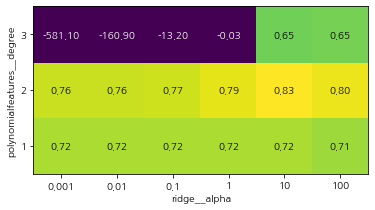

In [22]:
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(3, -1),
                      xlabel='ridge__alpha', ylabel='polynomialfeatures__degree',
                      xticklabels=param_grid['ridge__alpha'], 
                      yticklabels=param_grid['polynomialfeatures__degree'], vmin=0)

In [23]:
print('최적의 매개변수 : {}'.format(grid.best_params_))

최적의 매개변수 : {'polynomialfeatures__degree': 2, 'ridge__alpha': 10}


In [24]:
print('테스트 점수 : {:.2f}'.format(grid.score(x_test, y_test)))

테스트 점수 : 0.77


In [25]:
param_grid = {'ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(x_train, y_train)
print('다항 특성이 없을 때 점수 : {:.2f}'.format(grid.score(x_test, y_test)))

다항 특성이 없을 때 점수 : 0.63


In [26]:
# 모델 선택을 위한 그리드 서치
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])
param_grid = [{'classifier': [SVC()], 'preprocessing': [StandardScaler()],
               'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
               'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'classifier': [RandomForestClassifier(n_estimators=100)],
               'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}]

In [27]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(x_train, y_train)
print('최적의 매개변수 :\n{}\n'.format(grid.best_params_))
print('최상의 교차 검증 점수 : {:.2f}'.format(grid.best_score_))
print('테스트 점수 : {:.2f}'.format(grid.score(x_test, y_test)))

최적의 매개변수 :
{'classifier': SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

최상의 교차 검증 점수 : 0.99
테스트 점수 : 0.98
